/tmp/ipython-input-1009289260.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0157 - val_loss: 0.0023
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 9.3160e-04 - val_loss: 0.0013
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 8.2108e-04 - val_loss: 9.9509e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 7.6280e-04 - val_loss: 0.0014
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.2039e-04 - val_loss: 0.0021
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.2337e-04 - val_loss: 8.8628e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 7.4817e-04 - val_loss: 0.0012
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.1420e-04 - val_loss: 0.0011
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.6785e-04 - val_loss: 0.0011
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.8108e-04 - val_loss: 8.8763e-04
Epoch 12/20
50/50 ━━━━━━━━

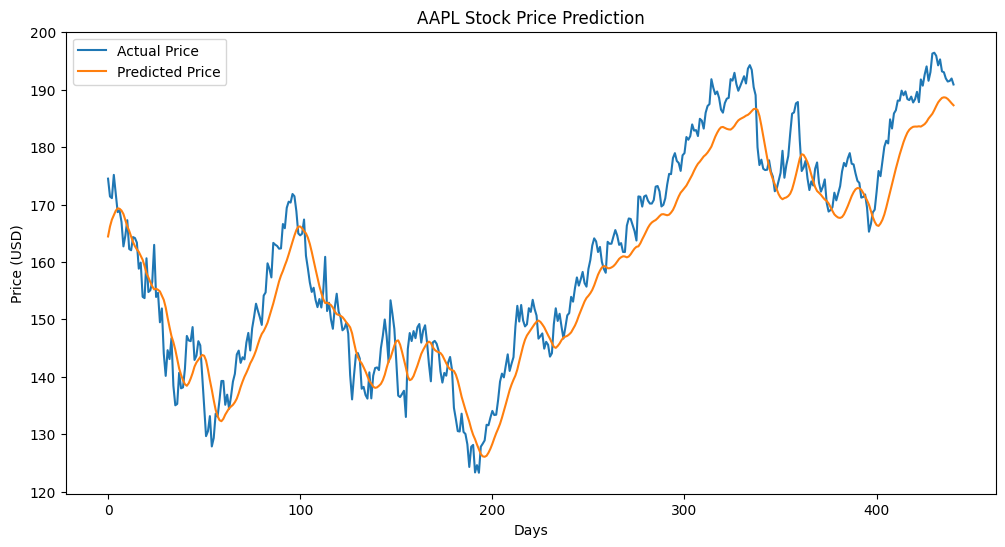

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
close_prices = data[['Close']].dropna()
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_prices, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(seq_len, 1)),
    Dropout(0.2),
    LSTM(50, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

predicted = model.predict(X_test)
predicted_inv = scaler.inverse_transform(predicted)
actual_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(actual_inv, predicted_inv)
mae = mean_absolute_error(actual_inv, predicted_inv)
acc = 100 - (np.mean(np.abs((actual_inv - predicted_inv) / actual_inv)) * 100)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Accuracy (approx): {acc:.2f}%")

plt.figure(figsize=(12,6))
plt.plot(actual_inv, label='Actual Price')
plt.plot(predicted_inv, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()